In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data_rumah = pd.read_excel('sample_data/data_rumah.xlsx', usecols=['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'])

In [ ]:
data_rumah.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [ ]:
data_rumah.shape

(1010, 6)

In [ ]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1010 non-null   int64
 1   LB      1010 non-null   int64
 2   LT      1010 non-null   int64
 3   KT      1010 non-null   int64
 4   KM      1010 non-null   int64
 5   GRS     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


In [ ]:
data_rumah.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
data_rumah.isnull().sum()

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


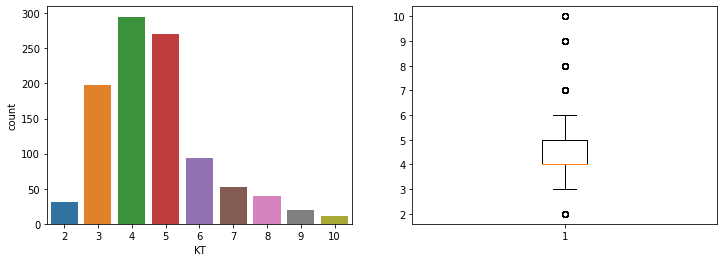

In [ ]:
#Univariate analysis KT.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_rumah['KT'])
f.add_subplot(1,2,2)
plt.boxplot(data_rumah['KT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


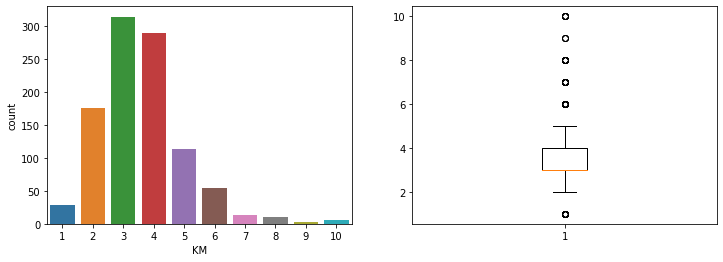

In [ ]:
#Univariate analysis KM.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_rumah['KM'])
f.add_subplot(1,2,2)
plt.boxplot(data_rumah['KM'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


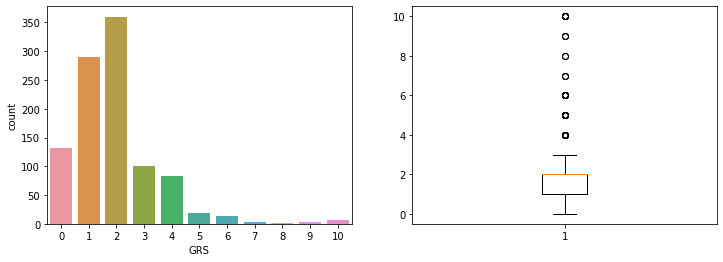

In [ ]:
#Univariate analysis GRS.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_rumah['GRS'])
f.add_subplot(1,2,2)
plt.boxplot(data_rumah['GRS'])
plt.show()

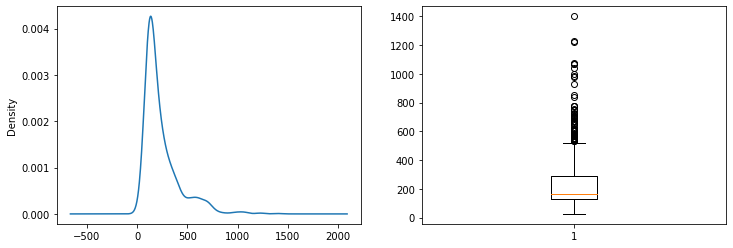

In [ ]:
#Univariate analysis LT.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_rumah['LT'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_rumah['LT'])
plt.show()

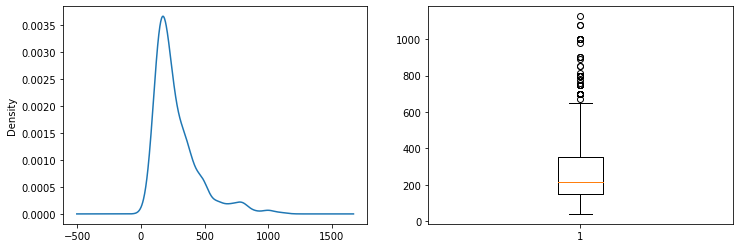

In [ ]:
#Univariate analysis LB.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_rumah['LB'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_rumah['LB'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

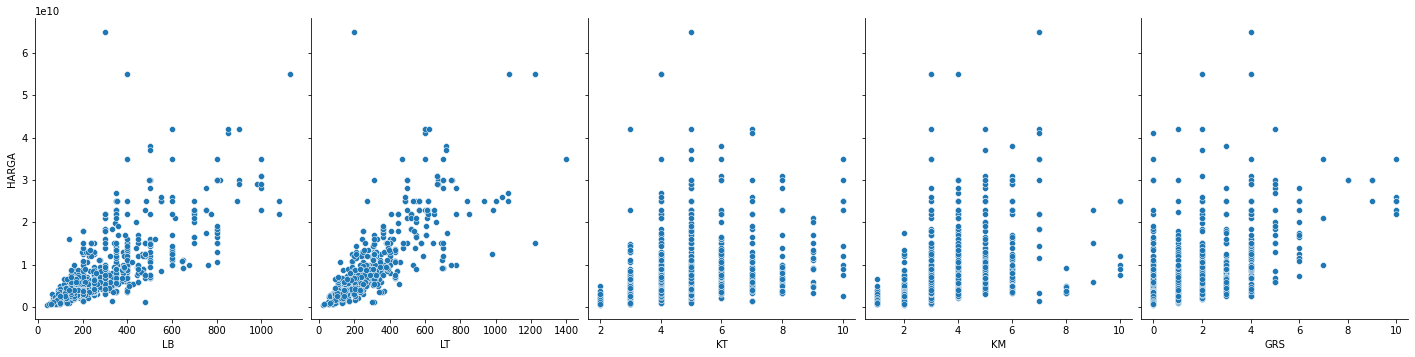

In [ ]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=data_rumah, x_vars=['LB', 'LT', 'KT', 'KM', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.80)

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
data_rumah.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,HARGA,LB,LT,KT,KM,GRS
HARGA,1.00,0.75,0.81,0.32,0.40,0.48
LB,0.75,1.00,0.74,0.44,0.53,0.49
LT,0.81,0.74,1.00,0.43,0.39,0.48
KT,0.32,0.44,0.43,1.00,0.67,0.28
KM,0.40,0.53,0.39,0.67,1.00,0.35
GRS,0.48,0.49,0.48,0.28,0.35,1.00


In [ ]:
#Pertama, buat variabel x dan y.
x = data_rumah.drop(columns='HARGA', axis=1)
y = data_rumah['HARGA']

#Kedua, ucup split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Ketiga, ucup bikin object linear regresi.
lin_reg = LinearRegression()

#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [ ]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print('')
print(lin_reg.intercept_)

[ 1.17719447e+07  2.39735509e+07 -5.03600046e+08  2.70180448e+08
  2.16730122e+08]

-444686723.13487625


In [ ]:
print('Training Accuracy :', lin_reg.score(x_train, y_train))
print('Testing Accuracy :', lin_reg.score(x_test, y_test))

Training Accuracy : 0.7427706352081715
Testing Accuracy : 0.6388704433330001


In [ ]:
#Prediksi harga rumah idaman Joko.
np.round(lin_reg.predict([[120,150,3,2,1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.81027017e+09])